<a href="https://colab.research.google.com/github/kv1441/LR_2.2/blob/main/LR_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
x = np.array([165, 156, 498, 3.15, 496, 132, 981, 135, 158, 864, 456, 894])
y = np.array([465, 135, 496, 159, 791, 168, 489, 163, 89, 213, 489, 564])

In [ ]:
#Расчёты
xy = x * y
x_squared = x * x
y_squared = y * y
x_mean = x.mean()
y_mean = y.mean()
x_x_mean = x - x_mean
y_y_mean = y - y_mean
x_x_mean_squared = x_x_mean * x_x_mean
y_y_mean_squared = y_y_mean * y_y_mean

In [ ]:
sigma_x_squared = x_squared.mean() - pow(x_mean, 2)
sigma_y_squared = y_squared.mean() - pow(y_mean, 2)
print("Сигма по x в квадрате равна", sigma_x_squared)
print("Сигма по y в квадрате равна", sigma_y_squared)

Сигма по x в квадрате равна 107510.20588541665
Сигма по y в квадрате равна 45926.02083333334


In [ ]:
b = (xy.mean() - x.mean() * y.mean()) / sigma_x_squared
print("b равно", b)
a = y.mean() - b * x.mean()
print("a равно", a)

b равно 0.34866425300079074
a равно 208.2703015870121


In [ ]:
regression_equation = f"y = {b:.2f}x + {a:.2f}"
print("Уравнение регрессии:")
print(regression_equation)

Уравнение регрессии:
y = 0.35x + 208.27


In [ ]:
y_regr = a + b * x
print(y_regr)

[265.79990333 262.66192506 381.90509958 209.36859398 381.20777108
 254.29398298 550.30993378 255.33997574 263.35925356 509.51621618
 367.26120096 519.97614377]


In [ ]:
y_y_regr = y - y_regr
y_y_regr_squared = y_y_regr * y_y_regr
print(y_y_regr)
print(y_y_regr_squared)

[ 199.20009667 -127.66192506  114.09490042  -50.36859398  409.79222892
  -86.29398298  -61.30993378  -92.33997574 -174.35925356 -296.51621618
  121.73879904   44.02385623]
[ 39680.67851248  16297.56710878  13017.64630153   2536.99525992
 167929.67088699   7446.65149909   3758.9079802    8526.67112006
  30401.1493024   87921.86645752  14820.33519283   1938.09991738]


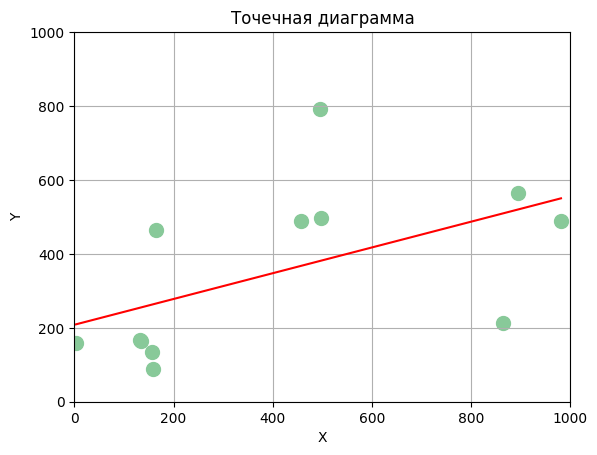

In [ ]:
# Точечная диаграмма
plt.scatter(x, y, color = '#88c999', s=100)

# Значения x для линии тренда
x_trend = np.linspace(min(x), max(x), 100)

# Значения y для линии тренда
y_trend = b * x_trend + a

#Линия тренда
plt.plot(x_trend, y_trend, color='red', label='Линия тренда')

plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.grid(True) # Сетка

# Названия осей
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Точечная диаграмма')

# Вывести диаграмму
plt.show()

In [ ]:
import math
r_xy = (xy.mean() - x.mean() * y.mean()) / math.sqrt(sigma_x_squared * sigma_y_squared)
print("Линейный коэффициент парной корреляции", r_xy)
# Связь от 0,5 до 0,7 - заметная по шкале Чеддока

Линейный коэффициент парной корреляции 0.5334612286742499


In [ ]:
S = math.sqrt(y_y_regr_squared.sum()/11)
print("Стандартная ошибка остаточной компоненты", S)

Стандартная ошибка остаточной компоненты 189.32325399581165


In [ ]:
sigma_a = S * math.sqrt(x_squared.sum()/(12*x_x_mean_squared.sum()))
sigma_b = (S * S) / math.sqrt(x_x_mean_squared.sum())
print("Средняя квадратичная ошибка а", sigma_a)
print("Средняя квадратичная ошибка b", sigma_b)

Средняя квадратичная ошибка а 87.7026884141439
Средняя квадратичная ошибка b 31.55676319151826


In [ ]:
t_a = a / sigma_a
t_b = b / sigma_b
print("Критерий Стьюдента а", t_a)
print("Критерий Стьюдента b", t_b)
# Коэффициент t_a > 2.20, следовательно коэффицент a надёжен
# Коэффициент t_b < 2.20, следовательно коэффицент b не надёжен

Критерий Стьюдента а 2.3747310983619077
Критерий Стьюдента b 0.011048796446097606


In [ ]:
# Расчёт доверительного интервала
delta_a = 2.2 * t_a
delta_b = 2.2 * t_b
a_lower_bound = a - delta_a
a_higher_bound = a + delta_a
b_lower_bound = b - delta_b
b_higher_bound = b + delta_b
print(f"Границы доверительного интервала для коэффициента a от {a_lower_bound} до {a_higher_bound}")
print(f"Границы доверительного интервала для коэффициента b от {b_lower_bound} до {b_higher_bound}")

Границы доверительного интервала для коэффициента a от 203.04589317061593 до 213.4947100034083
Границы доверительного интервала для коэффициента b от 0.324356900819376 до 0.37297160518220546


In [ ]:
#Чем уже доверительный интервал, тем точнее оценка параметра; если доверительный интервал включает нулевое значение,
#то оцениваемый параметр статистически незначим (равен нулю). В границы ноль не входит - коэффициенты статистически значимы

In [ ]:
#Таким образом, из-за ненадёжности, полученные оценки коэффициента регрессии b не являются эффективными и состоятельными, а само уравнение
#y = 0.35x + 208.27
#не может использоваться для моделирования и прогнозирования динамики. Это обусловлено большой ошибкой уравнения регрессии.
